In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.set()
%matplotlib inline

In [2]:
municipios = pd.read_csv('datasets/municipios_no_sp.csv').set_index('Município')

In [3]:
municipios.head(20)

,Posição,Estimativa 2019
Município,,
Guarulhos,2,1379182
Campinas,3,1204073
São Bernardo do Campo,4,838936
São José dos Campos,5,721944
Santo André,6,718773
Ribeirão Preto,7,703293
Osasco,8,698418
Sorocaba,9,679378
Mauá,10,472912


In [4]:
import unidecode

def normalizeWord(word):
    
    # lower case word
    word = word.lower()
    
    # remove accents
    word = unidecode.unidecode(word)
    
    return word

def joinSeparetedWord(word):
    
    # removing aspas
    word = word.split('\'')
    word = ''.join(word)
    
    # separete words from word
    word = word.split()
    
    # join separeted words by '-'
    word = '-'.join(word)
    
    return word

In [19]:
import sys
!{sys.executable} -m pip install progressbar2

In [25]:
from zipfile import ZipFile
import urllib.request
import progressbar
import os

def downloadDespesas(names, year = 2018, unzip = False):
    
    n = len(names)
    erros = []
    
    # widgets for progressbar
    widgets=[
        ' [', progressbar.Timer(), '] ',
        progressbar.Bar(),
        ' (', progressbar.Counter(), '/'+str(n)+') ',
    ]
    
    for i in range(n):
        name = names[i]
        
        # uniformalizing word for match
        name = normalizeWord(name)
        
        # replacing ' ' to '-'
        name = joinSeparetedWord(name)
        
        # request download
        url = 'https://transparencia.tce.sp.gov.br/sites/default/files/csv/despesas-' + name + '-' + str(year) + '.zip'
        try:
            zipName = 'downloads/' + name + '-' + str(year) + '.zip'
            urllib.request.urlretrieve(url, zipName)
            if unzip:
                with ZipFile(zipName, 'r') as zipObj:
                    zipObj.extractall('downloads/unziped')
                try:
                    os.rename('downloads/unziped/despesas-'+ name + '-' + str(year) + '.zip.csv', 'downloads/unziped/despesas-'+ name + '-' + str(year) + '.csv')
                except:
                    continue
        except:
            erros.append(name)
    if len(erros) == 0:
        print('All files have been downloaded!')
    else:
        print('Files not found:')
        print(erros)
        

In [26]:
municipios_nomes = ['Guarulhos']

In [27]:
sample = municipios.loc[municipios_nomes]

In [28]:
sample

,Posição,Estimativa 2019
Município,,
Guarulhos,2,1379182


In [34]:
downloadDespesas(sample.index, unzip = True, year = 2018)

All files have been downloaded!


In [119]:
name = 'barueri'
year = 2018

exemplo = pd.read_csv('downloads/unziped/despesas-' + name + '-'+str(year)+'.csv', sep = ';',  encoding = "ISO-8859-1")
exemplo.vl_despesa = exemplo.vl_despesa.apply(lambda x : float('.'.join(x.split(','))))

In [120]:
list(exemplo.columns)

['id_despesa_detalhe',
 'ano_exercicio',
 'ds_municipio',
 'ds_orgao',
 'mes_referencia',
 'mes_ref_extenso',
 'tp_despesa',
 'nr_empenho',
 'identificador_despesa',
 'ds_despesa',
 'dt_emissao_despesa',
 'vl_despesa',
 'ds_funcao_governo',
 'ds_subfuncao_governo',
 'cd_programa',
 'ds_programa',
 'cd_acao',
 'ds_acao',
 'ds_fonte_recurso',
 'ds_cd_aplicacao_fixo',
 'ds_modalidade_lic',
 'ds_elemento',
 'historico_despesa']

In [121]:
exemplo.head()

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,...,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
0,386546520,2018,Barueri,PREFEITURA MUNICIPAL DE BARUERI,1,Janeiro,Empenhado,1019-2018,IDENTIFICAÇÃO ESPECIAL - SEM CPF/CNPJ - 000000...,PAGAMENTO PESSOAL,...,ADMINISTRAÇÃO GERAL,2,APOIO POLÍTICO-ADMINISTRATIVO,2002,MANUT.DA SECRETARIA DE GOVERNO,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901101 - VENCIMENTOS E SALÁRIOS,VENCIMENTOS 2018
1,386546521,2018,Barueri,PREFEITURA MUNICIPAL DE BARUERI,1,Janeiro,Empenhado,637-2018,CNPJ - PESSOA JURÍDICA - 07606902000115,COMUNIDADE TERAPEUTICA CONQUISTA,...,ADMINISTRAÇÃO GERAL,2,APOIO POLÍTICO-ADMINISTRATIVO,2002,MANUT.DA SECRETARIA DE GOVERNO,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,33503900 - OUTROS SERVIÇOS DE TERCEIROS -PESSO...,TERMO DE CONVÊNIO N.054/13 - SERVIÇOS DIVERSOS...
2,386546522,2018,Barueri,PREFEITURA MUNICIPAL DE BARUERI,1,Janeiro,Empenhado,845-2018,IDENTIFICAÇÃO ESPECIAL - SEM CPF/CNPJ - 000000...,PAGAMENTO PESSOAL,...,ADMINISTRAÇÃO GERAL,2,APOIO POLÍTICO-ADMINISTRATIVO,2002,MANUT.DA SECRETARIA DE GOVERNO,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901101 - VENCIMENTOS E SALÁRIOS,"VENCIMENTOS 2018, ANTECIPAÇÃO SALARIAL REF.JAN..."
3,386546523,2018,Barueri,PREFEITURA MUNICIPAL DE BARUERI,1,Janeiro,Empenhado,942-2018,IDENTIFICAÇÃO ESPECIAL - SEM CPF/CNPJ - 000000...,PAGAMENTO PESSOAL,...,ADMINISTRAÇÃO GERAL,2,APOIO POLÍTICO-ADMINISTRATIVO,2002,MANUT.DA SECRETARIA DE GOVERNO,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901137 - GRATIFICAÇÃO POR TEMPO DE SERVIÇO,"VENCIMENTOS 2018, VENCIMENTOS REF.JANEIRO/18, ..."
4,386546524,2018,Barueri,PREFEITURA MUNICIPAL DE BARUERI,1,Janeiro,Empenhado,1139-2018,IDENTIFICAÇÃO ESPECIAL - SEM CPF/CNPJ - 000000...,PAGAMENTO PESSOAL,...,ADMINISTRAÇÃO GERAL,3,CENTRO DE SERVIÇOS PÚBLICOS,2003,GANHA TEMPO MUNICIPAL,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901101 - VENCIMENTOS E SALÁRIOS,"FÉRIAS 2018, ADIANTAMENTO DE FÉRIAS REF.FEVERE..."


In [24]:
exemplo['ds_elemento'].unique()

array(['33903999 - OUTROS SERVIÇOS DE TERCEIROS - PESSOA JURÍDICA',
       '31901699 - OUTRAS DESPESAS VARIÁVEIS - PESSOAL CIVIL',
       '31901160 - REMUNERAÇÃO DOS AGENTES POLÍTICOS',
       '33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS',
       '33909101 - SENTENÇAS PARA CRÉDITOS ALIMENTÍCIOS/ SENTENÇAS JUDICIAIS TRANSITADAS EM JULGADO',
       '33903017 - MATERIAL DE PROCESSAMENTO DE DADOS',
       '33903958 - SERVIÇOS DE TELECOMUNICAÇÕES',
       '33904800 - OUTROS AUXÍLIOS FINANCEIROS A PESSOA FÍSICA',
       '44905199 - OUTRAS OBRAS E INSTALAÇÕES',
       '33903024 - MATERIAL PARA MANUTENÇÃO DE BENS IMÓVEIS',
       '33903039 - MATERIAL PARA MANUTENÇÃO DE VEÍCULOS',
       '33903007 - GÊNEROS DE ALIMENTAÇÃO',
       '33903944 - SERVIÇOS DE ÁGUA E ESGOTO',
       '33903995 - MANUTENÇÃO E CONSERVAÇÃO DE EQUIPAMENTOS DE  PROCESSAMENTO DE DADOS',
       '31901101 - VENCIMENTOS E SALÁRIOS',
       '33903001 - COMBUSTÍVEIS E LUBRIFICANTES AUTOMOTIVOS',
       '33903981 - SERVIÇOS BANCÁR

In [16]:
exemplo.describe()

,id_despesa_detalhe,ano_exercicio,mes_referencia,vl_despesa,cd_programa,cd_acao
count,5.712700e+04,57127.0,57127.000000,5.712700e+04,57127.000000,57127.000000
mean,4.034618e+08,2018.0,7.094771,4.684693e+03,503.809897,1891.182628
std,9.765363e+06,0.0,3.238987,4.397077e+04,215.714049,363.814728
min,3.869957e+08,2018.0,1.000000,-4.726557e+05,101.000000,1.000000
25%,3.933062e+08,2018.0,4.000000,8.782000e+01,401.000000,2004.000000
50%,4.020383e+08,2018.0,7.000000,5.000000e+02,505.000000,2016.000000
75%,4.123858e+08,2018.0,10.000000,2.098740e+03,701.000000,2042.000000
max,4.186246e+08,2018.0,12.000000,8.301906e+06,1002.000000,2122.000000


Text(0.5, 1.0, 'Distribuição de valor das despesas - brotas')

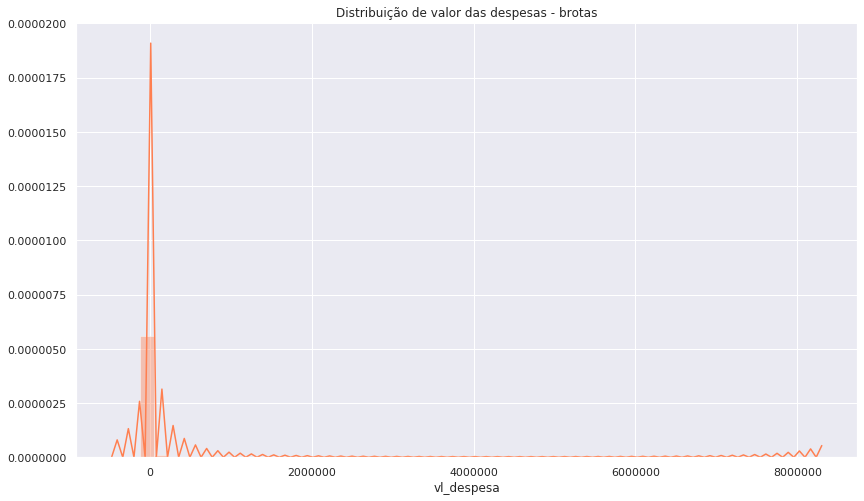

In [17]:
plt.figure(figsize=(14,8))
sns.distplot(exemplo.vl_despesa, color = 'coral')
plt.title('Distribuição de valor das despesas - ' + name)

In [18]:
list(exemplo['ds_programa'].unique())

['ADMINISTRAÇÃO CENTRAL',
 'DESFESA DO PODER EXECUTIVO',
 'CONTROLE DE RECURSOS E BENS MUNICIPAIS',
 'DEPARTAMENTO DE INFORMATICA',
 'SEGURANÇA MUNICIPAL',
 'SETOR URBANO',
 'ENSINO MEDIO/PROFISSIONALIZANTE',
 'MERENDA ESCOLAR',
 'EDUCAÇÃO INFANTIL',
 'TRANSPORTE DE ALUNOS',
 'ENSINO FUNDAMENTAL',
 'FUNDEB',
 'ATENÇÃO BASICA SERVIÇOS DE SAUDE',
 'DIFUSÃO CULTURAL',
 'CORPO DE BOMBEIROS',
 'TRANSPORTE URBANO',
 'ALIMENTAÇÃO INFANTIL',
 'ATENDIMENTO A MANDADO JUDICIAL',
 'AUXILIO TRANSPORTE',
 'Alimentação Ensino Médio/EJA',
 'CONVENIO COM A JUSTIÇA ELEITORAL',
 'Manutenção Serviços de Transporte da Saúde',
 'PROGRAMA ASSISTENCIA FARMACEUTICA',
 'PROGRAMA DE SAÚDE DA FAMILIA',
 'PROJETO EDUC´ AÇÃO',
 'ATENDIMENTO COMUNITARIO',
 'VIGILANCIA SANITARIA',
 'ESPORTE E LAZER',
 'ATENDIMENTO ÀS POLÍTICAS PÚBLICAS DA AÇÃO SOCIAL',
 'SEGURANÇA DO TRABALHO',
 'TURISMO MUNICIPAL',
 'CONTROLE DE ANIMAIS DOMESTICOS',
 'PRESERVAÇÃO DO MEIO AMBIENTE',
 'APOIO AO SETOR AGROPECUARIO DO MUNICIPIO',
 'PROC

Text(0.5, 1.0, 'Distribuição de valor das despesas (por: SETOR URBANO) - brotas')

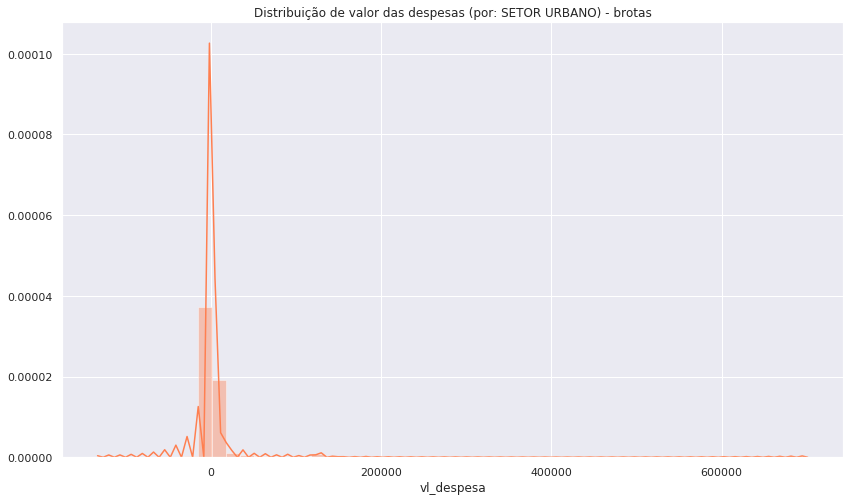

In [19]:
ref = 'SETOR URBANO'

plt.figure(figsize=(14,8))
sns.distplot(exemplo[exemplo['ds_programa'] == ref].vl_despesa, color = 'coral')
plt.title('Distribuição de valor das despesas (por: ' + ref + ') - ' + name)

 'cd_programa',
 'ds_programa',
 'cd_acao',
 'ds_acao',
 'ds_fonte_recurso',
 'ds_cd_aplicacao_fixo',
 'ds_modalidade_lic',
 'ds_elemento',
 'historico_despesa']

In [20]:
list(exemplo['ds_fonte_recurso'].unique())

['TESOURO',
 'TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINCULADOS',
 'TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS',
 'RECURSOS PRÓPRIOS DA ADMINISTRAÇÃO INDIRETA',
 'TRANSFERÊNCIAS E CONVÊNIOS ESTADUAIS-VINCULADOS - EXERCICIOS ANTERIORES',
 'TESOURO - EXERCICIOS ANTERIORES',
 'TRANSFERÊNCIAS E CONVÊNIOS FEDERAIS-VINCULADOS - EXERCICIOS ANTERIORES']

Text(0.5, 1.0, 'Distribuição de valor das despesas (por: TESOURO) - brotas')

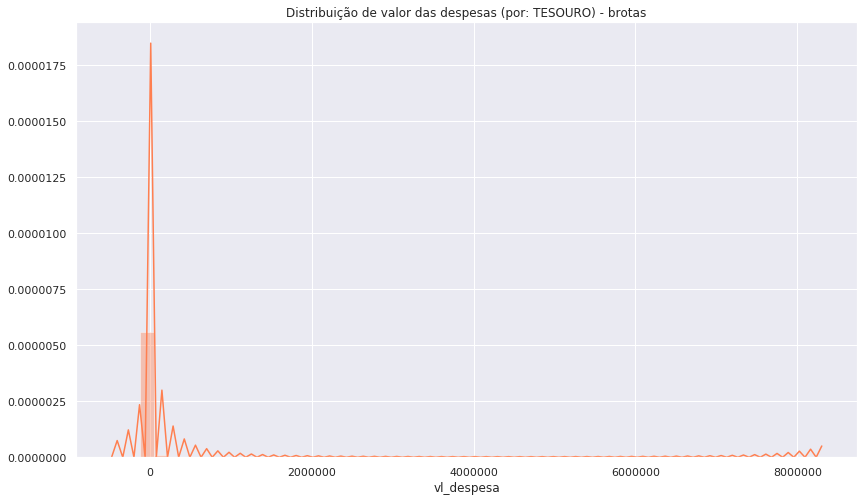

In [21]:
ref = 'TESOURO'

plt.figure(figsize=(14,8))
sns.distplot(exemplo[exemplo['ds_fonte_recurso'] == ref].vl_despesa, color = 'coral')
plt.title('Distribuição de valor das despesas (por: ' + ref + ') - ' + name)

In [22]:
programas = list(exemplo['ds_programa'].unique())
despesas = []
for programa in programas:
    temp = exemplo[exemplo['ds_programa'] == programa]['vl_despesa']
    despesas.append(temp.sum())
    
prog_despesas = pd.DataFrame({'ds_programa': programas})
prog_despesas['vl_despesa'] = despesas
prog_despesas = prog_despesas.set_index('ds_programa')
prog_despesas['%_despesa'] = prog_despesas['vl_despesa'].apply(lambda x : x/prog_despesas['vl_despesa'].sum()*100)
prog_despesas.sample(5)

,vl_despesa,%_despesa
ds_programa,,
ATENDIMENTO A MANDADO JUDICIAL,3959478.94,1.479502
ATENDIMENTO À PESSOA IDOSA,26154.21,0.009773
EDUCAÇÃO INFANTIL,16981020.19,6.345141
MERENDA ESCOLAR,2396002.84,0.895292
APOIO AO SETOR AGROPECUARIO DO MUNICIPIO,1131951.46,0.422966


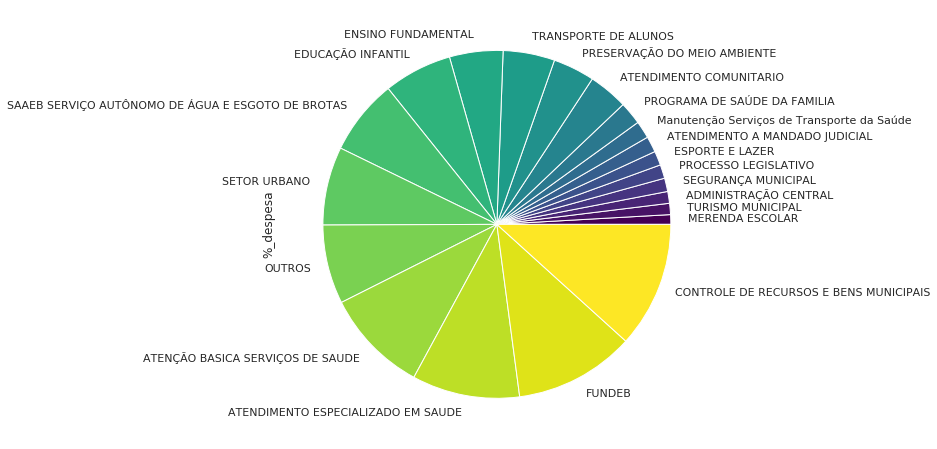

In [23]:
n = 20
m = len(prog_despesas) - n
aux = prog_despesas.sort_values(by = '%_despesa')

principais = aux.tail(n)
outros = aux.head(m)
temp = pd.DataFrame({'ds_programa': 'OUTROS',
                     'vl_despesa': [outros['vl_despesa'].sum()],
                     '%_despesa': [outros['%_despesa'].sum()]}).set_index('ds_programa')

todos = pd.concat([principais, temp], axis = 0)
todos = todos.sort_values(by = '%_despesa')

plt.figure(figsize = (15, 8))
todos['%_despesa'].plot(kind = 'pie', colormap = 'viridis')

del temp, aux

In [27]:
a = pd.DataFrame({'coluna 1': [1, 2, 3], 'coluna 2': [6, 6, 1]})

In [28]:
a

,coluna 1,coluna 2
0,1,6
1,2,6
2,3,1


In [37]:
a[a['coluna 1'] == 2]

,coluna 1,coluna 2
1,2,6


In [39]:
colunas = ['ano_exercicio', 'mes_ref_extenso', 'vl_despesa', 'ds_elemento']
exemplo[colunas]

,ano_exercicio,mes_ref_extenso,vl_despesa,ds_elemento
0,2018,Janeiro,10000.00,33903999 - OUTROS SERVIÇOS DE TERCEIROS - PESS...
1,2018,Janeiro,1125.73,31901699 - OUTRAS DESPESAS VARIÁVEIS - PESSOAL...
2,2018,Janeiro,5550.33,31901160 - REMUNERAÇÃO DOS AGENTES POLÍTICOS
3,2018,Janeiro,24000.00,33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS
4,2018,Janeiro,293.12,33909101 - SENTENÇAS PARA CRÉDITOS ALIMENTÍCIO...
5,2018,Janeiro,560.00,33903017 - MATERIAL DE PROCESSAMENTO DE DADOS
6,2018,Janeiro,7875.00,33903958 - SERVIÇOS DE TELECOMUNICAÇÕES
7,2018,Janeiro,3244.73,33904800 - OUTROS AUXÍLIOS FINANCEIROS A PESSO...
8,2018,Janeiro,13250.00,44905199 - OUTRAS OBRAS E INSTALAÇÕES
9,2018,Janeiro,617.55,33903024 - MATERIAL PARA MANUTENÇÃO DE BENS IM...


In [41]:
a = 'luca s ronaldo'
b = 's'

In [43]:
b in a

True

In [52]:
import unidecode

def normalizeSentence(sentence):
    
    temp = sentence.split(' ')
    new_sentence = []
    for word in temp:
        new_sentence.append(normalizeWord(word))
    new_sentence = ' '.join(new_sentence)
    
    return new_sentence

def normalizeWord(word):
    
    # lower case word
    word = word.lower()
    
    # remove accents
    word = unidecode.unidecode(word)
    
    return word

def joinSeparetedWord(word):
    
    # removing aspas
    word = word.split('\'')
    word = ''.join(word)
    
    # separete words from word
    word = word.split()
    
    # join separeted words by '-'
    word = '-'.join(word)
    
    return word

def selectByWord(word, sentences):
    # select subset of sentences that contains word
    # return indexs of sentences
    
    # normalize word
    normalized_word = normalizeWord(word)
    
    indexs = []
    
    for i, sentence in enumerate(sentences):
        # normalize sentence
        normalized_sentence = normalizeSentence(sentence)
        
        if normalized_word in normalized_sentence:
            #print(i, normalized_sentence)
            indexs.append(i)
    return indexs

def selectDfRowsByWord(data, word, column):
    '''
    Select specific rows that contains especific word in the column
    '''
    
    sentences = np.array(data[column].unique())

    # find sentences
    idxs = selectByWord(word, sentences)
    obj_sentences = sentences[idxs]

    servicos = pd.DataFrame()
    for sentence in obj_sentences:

        # select rows of exemplo
        temp = data[data[column] == sentence]

        # concatenate
        servicos = pd.concat([servicos, temp])
    try:
        temp = len(servicos[column].unique())
    except:
        print(word + ': Not found')
    
    return servicos.copy()

In [74]:
exemplo.columns

Index(['id_despesa_detalhe', 'ano_exercicio', 'ds_municipio', 'ds_orgao',
       'mes_referencia', 'mes_ref_extenso', 'tp_despesa', 'nr_empenho',
       'identificador_despesa', 'ds_despesa', 'dt_emissao_despesa',
       'vl_despesa', 'ds_funcao_governo', 'ds_subfuncao_governo',
       'cd_programa', 'ds_programa', 'cd_acao', 'ds_acao', 'ds_fonte_recurso',
       'ds_cd_aplicacao_fixo', 'ds_modalidade_lic', 'ds_elemento',
       'historico_despesa'],
      dtype='object')

In [86]:
exemplo.shape

(90143, 23)

In [134]:
list(exemplo['historico_despesa'].unique())

['VENCIMENTOS 2018',
 'TERMO DE CONVÊNIO N.054/13 - SERVIÇOS DIVERSOS, TERMO DE CONVÊNIO N.054/13 - SERVIÇOS DIVERSOS, TERMO DE CONVÊNIO N.054/13 - SERVIÇOS DIVERSOS, TERMO DE CONVÊNIO N.054/13 - SERVIÇOS DIVERSOS',
 'VENCIMENTOS 2018, ANTECIPAÇÃO SALARIAL REF.JANEIRO/18, VENCIMENTOS REF.JANEIRO/18, ANTECIPAÇÃO SALARIAL REF.FEVEREIRO/18, VENCIMENTOS REF.FEVEREIRO/18, ANTECIPAÇÃO SALARIAL REF.MARÇO/18',
 'VENCIMENTOS 2018, VENCIMENTOS REF.JANEIRO/18, VENCIMENTOS REF.FEVEREIRO/18',
 'FÉRIAS 2018, ADIANTAMENTO DE FÉRIAS REF.FEVEREIRO/18, ADIANTAMENTO DE FÉRIAS REF.MARÇO/18',
 'PRÓ-LABORE 2018, PRÓ-LABORE, PRÓ-LABORE',
 'PRÓ-LABORE 2018, PRÓ-LABORE',
 'REEMBOLSO DE HONORARIOS DE PRESTAÇÃO DE SERVIÇOS, REEMBOLSO DE HONORARIOS DE PRESTAÇÃO DE SERVIÇOS',
 'REEMBOLSO DE HONORARIOS DE PRESTAÇÃO DE SERVIÇO, REEMBOLSO DE HONORARIOS DE PRESTAÇÃO DE SERVIÇO',
 nan,
 'CONSUMO DE ENERGIA ELÉTRICA, CONSUMO DE ENERGIA ELÉTRICA, CONSUMO DE ENERGIA ELÉTRICA, CONSUMO DE ENERGIA ELÉTRICA',
 'CONTRATO N.328

In [64]:
selectDfRowsByWord(exemplo, '', 'ds_fonte_recurso')

,id_despesa_detalhe,ano_exercicio,ds_municipio,ds_orgao,mes_referencia,mes_ref_extenso,tp_despesa,nr_empenho,identificador_despesa,ds_despesa,...,ds_subfuncao_governo,cd_programa,ds_programa,cd_acao,ds_acao,ds_fonte_recurso,ds_cd_aplicacao_fixo,ds_modalidade_lic,ds_elemento,historico_despesa
0,386995719,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,241-2018,CNPJ - PESSOA JURÍDICA - 49634363000178,CARTORIO REG IMOVEIS E ANEXOS DA COMARCA,...,ADMINISTRAÇÃO GERAL,201,ADMINISTRAÇÃO CENTRAL,2002,MANUTENÇÃO DA ADMINISTRAÇÃO CENTRAL,TESOURO,0110 - GERAL,INEXIGÍVEL,33903999 - OUTROS SERVIÇOS DE TERCEIROS - PESS...,NaN
1,386995720,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,642-2018,IDENTIFICAÇÃO ESPECIAL - SEM CPF/CNPJ - 111,FOLHA DE PAGAMENTO,...,DEFESA DO INTERESSE PÚBLICO NO PROCESSO JUDICI...,202,DESFESA DO PODER EXECUTIVO,2003,MANUTENÇÃO DA PROCURADORIA JURÍDICA DO MUNICÍPIO,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901699 - OUTRAS DESPESAS VARIÁVEIS - PESSOAL...,1 FOLHA DE PAGAMENTO
2,386995721,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,648-2018,IDENTIFICAÇÃO ESPECIAL - SEM CPF/CNPJ - 111,FOLHA DE PAGAMENTO,...,ADMINISTRAÇÃO FINANCEIRA,203,CONTROLE DE RECURSOS E BENS MUNICIPAIS,2004,MANUTENÇÃO DO SETOR DE CONTROLE DE RECURSOS E ...,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,31901160 - REMUNERAÇÃO DOS AGENTES POLÍTICOS,1 FOLHA DE PAGAMENTO
3,386995729,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,36-2018,CNPJ - PESSOA JURÍDICA - 08496850000134,CONFIATTA CONSULTORIA E GESTAO LTDA EPP,...,ADMINISTRAÇÃO FINANCEIRA,203,CONTROLE DE RECURSOS E BENS MUNICIPAIS,2004,MANUTENÇÃO DO SETOR DE CONTROLE DE RECURSOS E ...,TESOURO,0110 - GERAL,TOMADA DE PREÇOS,33903905 - SERVIÇOS TÉCNICOS PROFISSIONAIS,CONTRATACAO DE SERVICOS TECNICOS PROFISSIONAIS...
4,386995730,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,793-2018,PESSOA FÍSICA - 727548,NAYARA RAMOS DE SANTIS,...,ADMINISTRAÇÃO FINANCEIRA,203,CONTROLE DE RECURSOS E BENS MUNICIPAIS,14,PRECATORIOS PEQUENO VALOR,TESOURO,0110 - GERAL,DISPENSA DE LICITAÇÃO,33909101 - SENTENÇAS PARA CRÉDITOS ALIMENTÍCIO...,1 PRECATORIO DE PQ VALOR PROCESSO 192 18
5,386995734,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,813-2018,CNPJ - PESSOA JURÍDICA - 04301704000155,GERALDO ZANOLA JUNIOR JAU EPP,...,ADMINISTRAÇÃO FINANCEIRA,203,CONTROLE DE RECURSOS E BENS MUNICIPAIS,2004,MANUTENÇÃO DO SETOR DE CONTROLE DE RECURSOS E ...,TESOURO,0110 - GERAL,DISPENSA DE LICITAÇÃO,33903017 - MATERIAL DE PROCESSAMENTO DE DADOS,EMPENHO DA DESPESA 1 TONER COMPATIVEL PARA IMP...
6,386995738,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,433-2018,CNPJ - PESSOA JURÍDICA - 05509060000158,VIAFAST PROVEDOR DE INTERNET LTDA ME,...,TECNOLOGIA DA INFORMATIZAÇÃO,204,DEPARTAMENTO DE INFORMATICA,2005,MANUTENÇÃO DO CPD,TESOURO,0110 - GERAL,DISPENSA DE LICITAÇÃO,33903958 - SERVIÇOS DE TELECOMUNICAÇÕES,EMPENHO DA DESPESA 1 CONTRATACAO EMPRESA SERVI...
7,386995742,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,814-2018,PESSOA FÍSICA - 364218,GUSTAVO ARRUDA DE OLIVEIRA E OUTROS,...,POLICIAMENTO,205,SEGURANÇA MUNICIPAL,2044,CONVÊNIOS SECRETARIA DE SEGURANÇA PÚBLICA,TESOURO,0110 - GERAL,OUTROS/NÃO APLICÁVEL,33904800 - OUTROS AUXÍLIOS FINANCEIROS A PESSO...,1 PRO LABORE MES DE JANEIRO 18
8,386995746,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,31-2018,CNPJ - PESSOA JURÍDICA - 00637923000159,FORTPAV PAVIMENTACAO E SERVICOS LTDA,...,INFRA-ESTRUTURA URBANA,301,SETOR URBANO,2113,OPERAÇÃO TAPA BURACO,TESOURO,0110 - GERAL,PREGÃO,44905199 - OUTRAS OBRAS E INSTALAÇÕES,EMPENHO DA DESPESA 1 CBUQ CONCRETO BETUMINOSO...
9,386995750,2018,Brotas,PREFEITURA MUNICIPAL DE BROTAS,1,Janeiro,Empenhado,556-2018,CNPJ - PESSOA JURÍDICA - 05403013000125,JORDANI MATERIAIS P CONSTRUCAO LTDA ME,...,INFRA-ESTRUTURA URBANA,301,SETOR URBANO,2008,MANUTENÇÃO DO SETOR URBANO,TESOURO,0110 - GERAL,DISPENSA DE LICITAÇÃO,33903024 - MATE

In [124]:
a = pd.DataFrame({'dasd': [np.nan]})

In [125]:
a

,dasd
0,NaN


In [129]:
a['dasd'].unique()

array([nan])